In [119]:
# importing libraries
from itertools import chain
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import os
import cv2
import seaborn as sns
import matplotlib as mp
import random
from tqdm import tqdm # for progress bar
import tensorflow as tf
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Dense, Input, Concatenate, Activation
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
import pandas as pd
import glob
from sklearn.model_selection import train_test_split

# Library for Transfer Learning
from tensorflow.keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

print("Importing libraries completed.")

Importing libraries completed.


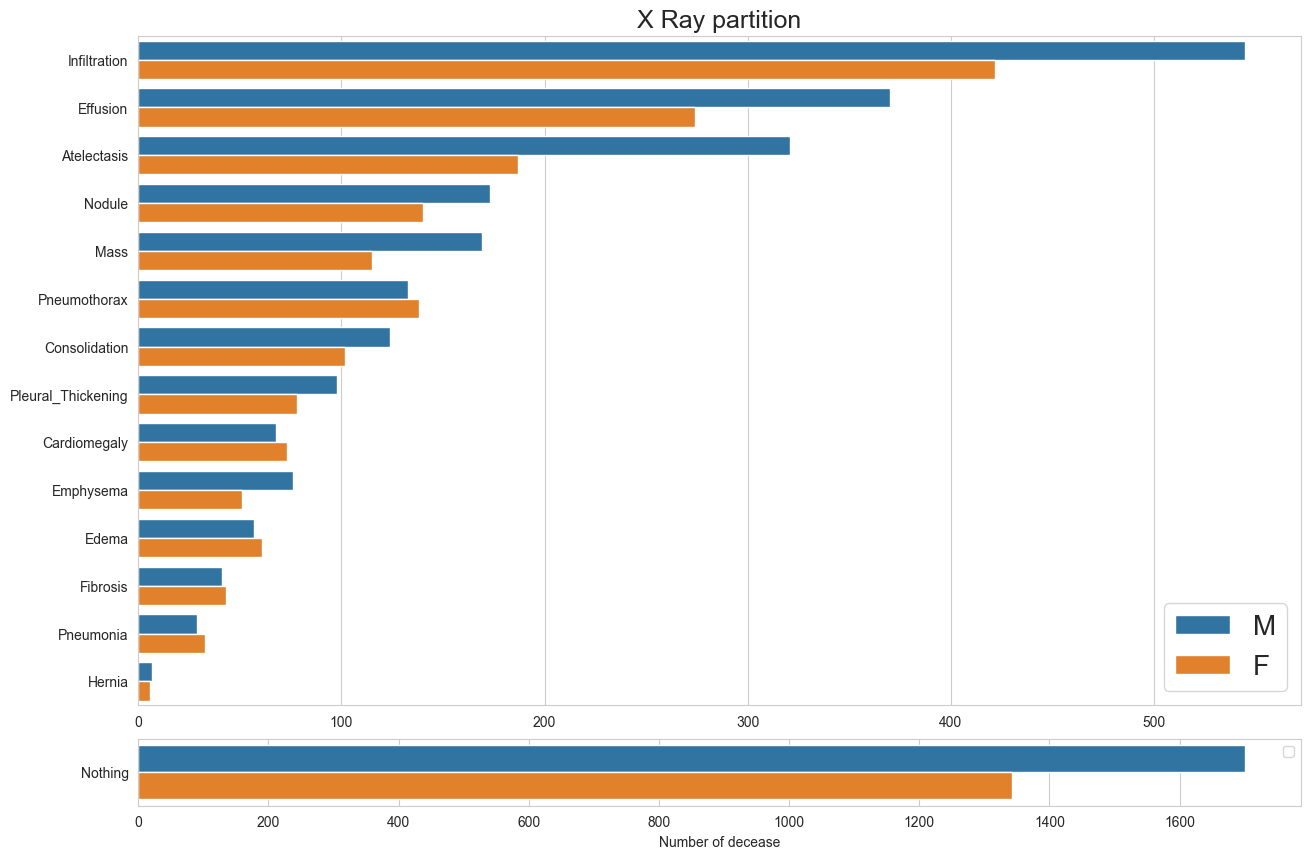

In [120]:
label_df = pd.read_csv('/Users/a080528/Downloads/chest-xray/sample_labels.csv')
label_df = label_df[['Image Index','Finding Labels','Follow-up #','Patient ID','Patient Age','Patient Gender']]
pathology_list = ['Cardiomegaly','Emphysema','Effusion','Hernia','Nodule','Pneumothorax','Atelectasis','Pleural_Thickening','Mass','Edema','Consolidation','Infiltration','Fibrosis','Pneumonia']
for pathology in pathology_list :
    label_df[pathology] = label_df['Finding Labels'].apply(lambda x: 1 if pathology in x else 0)
#remove Y after age
label_df['Age']=label_df['Patient Age'].apply(lambda x: x[:-1]).astype(int)

plt.figure(figsize=(15,10))
gs = mp.gridspec.GridSpec(8,1)
ax1 = plt.subplot(gs[:7, :])
ax2 = plt.subplot(gs[7, :])
data1 = pd.melt(label_df,
             id_vars=['Patient Gender'],
             value_vars = list(pathology_list),
             var_name = 'Category',
             value_name = 'Count')
data1 = data1.loc[data1.Count>0]
g=sns.countplot(y='Category',hue='Patient Gender',data=data1, ax=ax1, order = data1['Category'].value_counts().index)
ax1.set( ylabel="",xlabel="")
ax1.legend(fontsize=20)
ax1.set_title('X Ray partition',fontsize=18);

label_df['Nothing']=label_df['Finding Labels'].apply(lambda x: 1 if 'No Finding' in x else 0)

data2 = pd.melt(label_df,
             id_vars=['Patient Gender'],
             value_vars = list(['Nothing']),
             var_name = 'Category',
             value_name = 'Count')
data2 = data2.loc[data2.Count>0]
g=sns.countplot(y='Category',hue='Patient Gender',data=data2,ax=ax2)
ax2.set( ylabel="",xlabel="Number of decease")
ax2.legend('')
plt.subplots_adjust(hspace=.5)

In [121]:
images = glob.glob('/Users/a080528/Downloads/chest-xray/images/*.png')

def proc_images(w, h):
    """
    Returns two arrays: 
        x is an array of resized images
        y is an array of labels
    """
    NoFinding = "No Finding" #0
    Consolidation="Consolidation" #1
    Infiltration="Infiltration" #2
    Pneumothorax="Pneumothorax" #3
    Edema="Edema" # 7
    Emphysema="Emphysema" #7
    Fibrosis="Fibrosis" #7
    Effusion="Effusion" #4
    Pneumonia="Pneumonia" #7
    Pleural_Thickening="Pleural_Thickening" #7
    Cardiomegaly="Cardiomegaly" #7
    NoduleMass="Nodule" #5
    Hernia="Hernia" #7
    Atelectasis="Atelectasis"  #6 
    RareClass = ["Edema", "Emphysema", "Fibrosis", "Pneumonia", "Pleural_Thickening", "Cardiomegaly","Hernia"]
    x = [] # images as arrays
    y = [] # labels
    WIDTH = w
    HEIGHT = h
    for img in images:
        base = os.path.basename(img)
        # Read and resize image
        full_size_image = cv2.imread(img)
        finding = label_df["Finding Labels"][label_df["Image Index"] == base].values[0]
        symbol = "|"
        if symbol in finding:
            continue
        else:
            if NoFinding in finding:
                finding = 0
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))      
            elif Consolidation in finding:
                finding = 1
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            elif Infiltration in finding:
                finding = 2
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            elif Pneumothorax in finding:
                finding = 3
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            elif Edema in finding:
                finding = 7
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            elif Emphysema in finding:
                finding = 7
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            elif Fibrosis in finding:
                finding = 7
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            elif Effusion in finding:
                finding = 4
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            elif Pneumonia in finding:
                finding = 7
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            elif Pleural_Thickening in finding:
                finding = 7
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            elif Cardiomegaly in finding:
                finding = 7
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            elif NoduleMass in finding:
                finding = 5
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            elif Hernia in finding:
                finding = 7
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            elif Atelectasis in finding:
                finding = 6
                y.append(finding)
                x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            else:
                continue

    return x,y

In [122]:
X,Dy = proc_images(w = 128, h = 128)
df = pd.DataFrame()
df["images"]=X
df["labels"]=Dy
print(len(df), df.images[0].shape)

4527 (128, 128, 3)


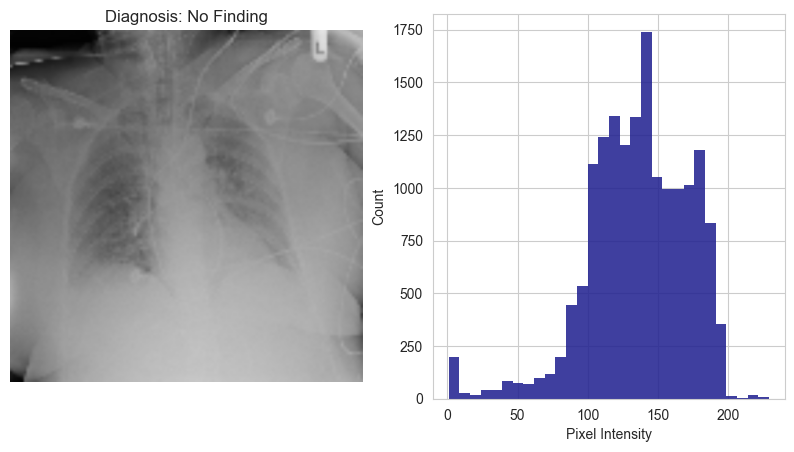

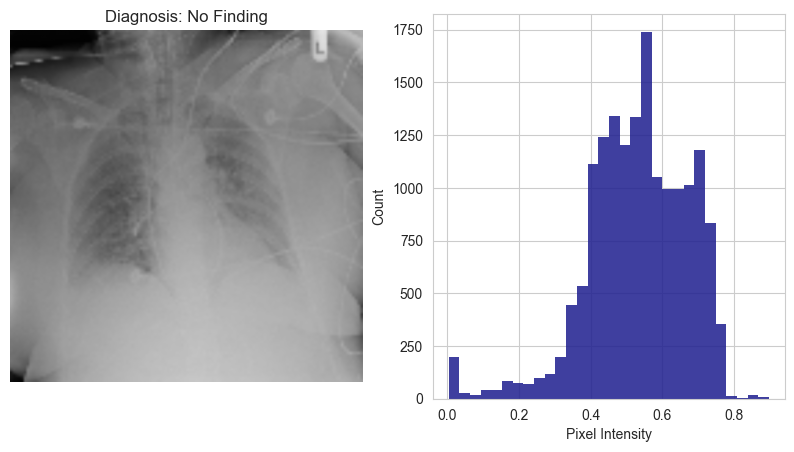

In [124]:
dict_characters = {0: 'No Finding',1: 'Consolidation', 2: 'Infiltration', 
        3: 'Pneumothorax', 4:'Effusion', 5: 'Nodule Mass', 6: 'Atelectasis', 7: "Other Rare Classes"}

def plotHistogram(a, b):
    """
    Plot histogram of RGB Pixel Intensities
    """
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title('Diagnosis: '+ dict_characters[b])
    b = cv2.resize(a, (512,512))
    plt.imshow(b)
    plt.axis('off')
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);

    
plotHistogram(X[3], Dy[3])
# Down-scale
X = np.array(X)
DX = X/255.0
plotHistogram(DX[3], Dy[3])

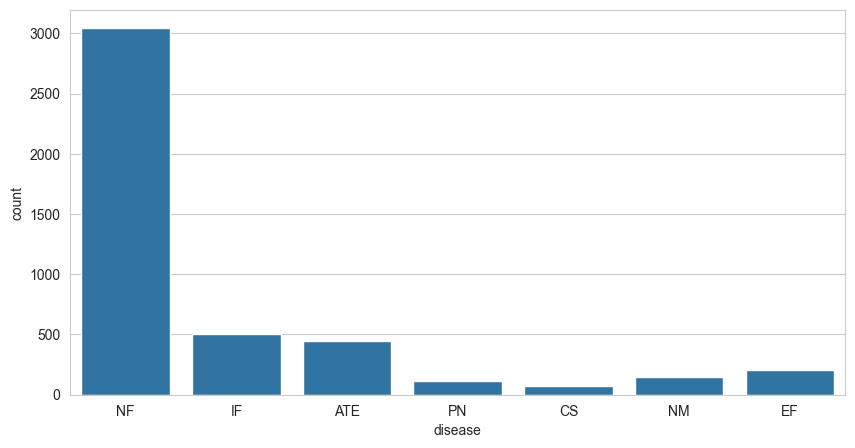

In [125]:
NoFinding = "No Finding" #0
Consolidation="Consolidation" #1
Infiltration="Infiltration" #2
Pneumothorax="Pneumothorax" #3
Effusion="Effusion" #4
NoduleMass="Nodule" #5
Atelectasis="Atelectasis"  #6 
dlist = []
labellist = ['NF','CS','IF','PN','EF','NM','ATE']

for i in list(df.labels):
    if i == 0:
        dlist.append('NF')
    elif i == 1:
        dlist.append('CS')
    elif i == 2:
        dlist.append('IF')
    elif i == 3:
        dlist.append('PN')
    elif i == 4:
        dlist.append('EF')
    elif i == 5:
        dlist.append('NM')
    else:
        dlist.append('ATE')
        
df['disease'] = dlist

dsdf = pd.DataFrame()
dsdf["images"]=list(DX)
dsdf["labels"]=Dy
dsdf['disease'] = dlist

plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.countplot(df, x="disease")
plt.show()

In [126]:
# Find the category with largest data size
Cnt = Counter(Dy)
max_key = max(Cnt, key=Cnt.get)
large_size = Cnt[max_key]

In [127]:
# Binary over-sampling

def smote_syn(df, mostcate, imbcate):

    imb_X = None
    imb_y = None
    
    for cat in imbcate:
        subdf = df[(df['disease'] == mostcate) | (df['disease'] == cat)].reset_index(drop= True)
        
        Cnt = Counter(subdf.labels)
        min_key = min(Cnt, key=Cnt.get)
        
        sm = SMOTE()
        X, y = subdf.images, list(subdf.labels)
        w, h, c = X[0].shape
        n = len(X)
        ar = np.empty((n,w,h,c))
    
        for i in range(len(X)):
            ar[i,:,:,:] = X[i]
    
        transx = ar.reshape(n, w*h*c)
        x_smote, y_smote = sm.fit_resample(transx, y)
        rn = x_smote.shape[0]
        x_smote = x_smote.reshape((rn,w,h,c))

        y_smote = np.array(y_smote)
        imb_ind = np.where(y_smote == min_key)[0]

        if imb_X is None:
            imb_X = x_smote[imb_ind, :, :, :]
            imb_y = y_smote[imb_ind]
        else:
            imb_X = np.concatenate([imb_X, x_smote[imb_ind, :, :, :]])
            imb_y = np.concatenate([imb_y, y_smote[imb_ind]])
            
    return imb_X, imb_y

In [128]:
def df2arr(df):

  n = len(df)
  w, h, c = df[0].shape
  arr = np.empty((n, w, h, c))

  for i in range(n):
    arr[i,:,:,:] = df[i]

  return arr
    
imbX_smote, imbY_smote= smote_syn(dsdf, labellist[0], labellist[1:])
NFX_smote, NFY_smote = dsdf[dsdf.labels == 0]['images'].reset_index(drop = True), dsdf[dsdf.labels == 0]['labels'].reset_index(drop = True)
NFX_smote = df2arr(NFX_smote)
synthesisX, synthesisY = np.concatenate([NFX_smote, imbX_smote]), np.concatenate([NFY_smote, imbY_smote])

### Storing

In [133]:
import hickle as hkl 

#storing the data in HDF5 because of the oversizing for npy file
data = {'name': 'data', 'smote_X': synthesisX, 'smote_Y': synthesisY, 'origin_X': DX, 'origin_Y':Dy}
hkl.dump(data, 'synthesis_origin.hkl')

In [ ]:
data2 = hkl.load('new_data_file.hkl')

### Sampling

In [284]:
def sample_data_ind(X, y, num1, size1, num2, size2):
    y = np.array(y)
    num1ind = np.where(y == num1)
    num2ind = np.where(y == num2)
    numsind1 = np.random.choice(np.where(y == num1)[0], size1)
    numsind2 = np.random.choice(np.where(y == num2)[0], size2)
    numsinds = np.concatenate([numsind1, numsind2])
    np.random.shuffle(numsinds)
    sx = X[numsinds]
    sy = y[numsinds]

    sy[sy == num1] = 0
    sy[sy == num2] = 1
    
    return sx, sy

In [285]:
ts, ty = sample_data_ind(DX, Dy, 0, 500, 2, 500)
X_train, X_test, Y_train, Y_test = train_test_split(ts, ty, test_size=0.2)

test_images=[]
test_images=X_test
test_images_Original=[]
test_images_Original=X_test
test_image_label=[] # to store the labels of the images
test_image_label=Y_test

val_images=[]
val_images=X_test
val_images_Original=[]
val_images_Original=X_test
val_image_label=[] # to store the labels of the images
val_image_label=Y_test # to store the labels of the images

print("Preparing Dataset Completed.")

Preparing Dataset Completed.


In [286]:
# Training Dataset
print("Training Dataset")

x=np.array(X_train) # Converting to np arrary to pass to the model
print(x.shape)

y=to_categorical(Y_train) # onehot encoding of the labels
# print(y)
print(y.shape)

# Test Dataset
print("Test Dataset")

test_images=np.array(test_images) 
print(test_images.shape)

test_image_label=to_categorical(test_image_label) # onehot encoding of the labels)
print(test_image_label.shape)

# Validation Dataset
print("Validation Dataset")

val_images=np.array(val_images) 
print(val_images.shape)

val_image_label=to_categorical(val_image_label) # onehot encoding of the labels)
print(val_image_label.shape)

Training Dataset
(800, 128, 128, 3)
(800, 2)
Test Dataset
(200, 128, 128, 3)
(200, 2)
Validation Dataset
(200, 128, 128, 3)
(200, 2)


In [287]:
# Check properties of the model that we are going to use for Transfer Learning

print("Summary of default VGG16 model.\n")

# we are using VGG16 for transfer learnin here. So we have imported it
from tensorflow.keras.applications import VGG16

# initializing model with weights='imagenet'i.e. we are carring its original weights
model_vgg16=VGG16(weights='imagenet',input_tensor=input_layer,include_top=False)

Summary of default VGG16 model.



In [289]:
# Modelling WITH Transfer Learning

# Here we will prepare model as per our requirements

print("Summary of Custom VGG16 model.\n")
print("1) We setup input layer and 2) We removed top (last) layer. \n")

# let us prepare our input_layer to pass our image size. default is (224,224,3). we will change it to (224,224,3)
input_layer=layers.Input(shape=(128,128,3))

# initialize the transfer model VGG16 with appropriate properties per our need.
# we are passing paramers as following
# 1) weights='imagenet' - Using this we are carring weights as of original weights.
# 2) input_tensor to pass the VGG16 using input_tensor
# 3) we want to change the last layer so we are not including top layer
model_vgg16=VGG16(weights='imagenet',input_tensor=input_layer,include_top=False)

Summary of Custom VGG16 model.

1) We setup input layer and 2) We removed top (last) layer. 



In [290]:
# access the current last layer of the model and add flatten and dense after it

print("Summary of Custom VGG16 model.\n")
print("1) We flatten the last layer and added 1 Dense layer and 1 output layer.\n")

last_layer=model_vgg16.output # we are taking last layer of the model

# Add flatten layer: we are extending Neural Network by adding flattn layer
flatten=layers.Flatten()(last_layer) 

# Add dense layer to the final output layer
output_layer=layers.Dense(2,activation='softmax')(flatten)

# Creating modle with input and output layer
model=models.Model(inputs=input_layer,outputs=output_layer)

# Summarize the model
model.summary()

Summary of Custom VGG16 model.

1) We flatten the last layer and added 1 Dense layer and 1 output layer.



Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │        16,386 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,731,074 (56.19 MB)

 Trainable params: 14,731,074 (56.19 MB)

 Non-trainable params: 0 (0.00 B)

In [291]:
# we will freez all the layers except the last layer
# we are making all the layers intrainable except the last layer
print("We are making all the layers intrainable except the last layer. \n")
for layer in model.layers[:-1]:
    layer.trainable=False
model.summary()

We are making all the layers intrainable except the last layer. 



Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │        16,386 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,731,074 (56.19 MB)

 Trainable params: 16,386 (64.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

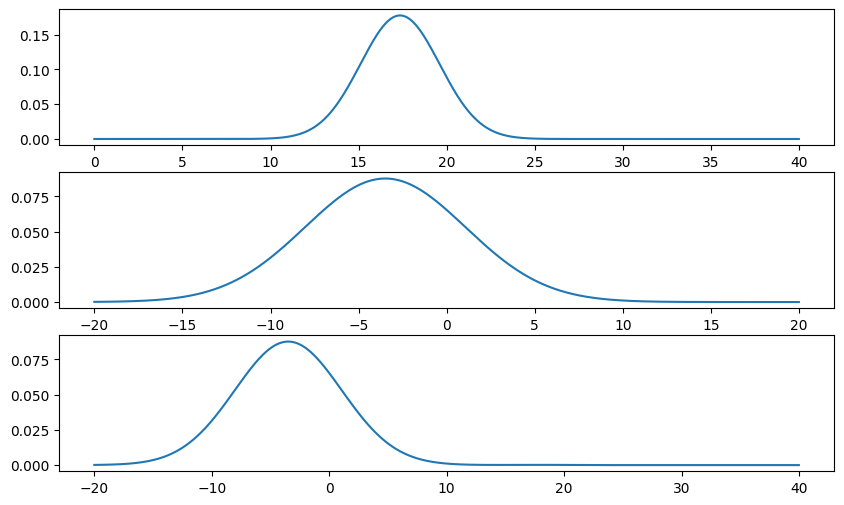

In [237]:
plt.figure(figsize = (10,6))
plt.subplot(3,1,1)
plt.plot(np.arange(0, 40, 0.01), norm.pdf(np.arange(0, 40, 0.01), spred[2], spred[4]))
plt.subplot(3,1,2)
plt.plot(np.arange(-20, 20, 0.01), norm.pdf(np.arange(-20, 20, 0.01), spred[3], spred[5]))
plt.subplot(3,1,3)
ymix = spred[0]*norm.pdf(np.arange(-20, 40, 0.01), spred[2], spred[4]) + spred[1]*norm.pdf(np.arange(-20, 40, 0.01), spred[3], spred[5])
plt.plot(np.arange(-20, 40, 0.01), ymix)
plt.show()

## How to utilize SMOTE to generate synthesis COVID Images